In [61]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
books = pd.read_csv('books.csv')
reatings = pd.read_csv('ratings.csv')

In [63]:
books["features"] = books["Title"] + " " + books["Author"] + " " + books["Genre"] 
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(books["features"])
content_similarity = cosine_similarity(tfidf_matrix)

In [64]:
book_index = 0
similar_books = content_similarity[book_index].argsort()[::-1][1:4]  
print("Content Based Recommendations for 'Harry Potter':")
print(books.iloc[similar_books]["Title"].tolist())

Content Based Recommendations for 'Harry Potter':
['The Hobbit', 'Percy Jackson', 'Angels and Demons']


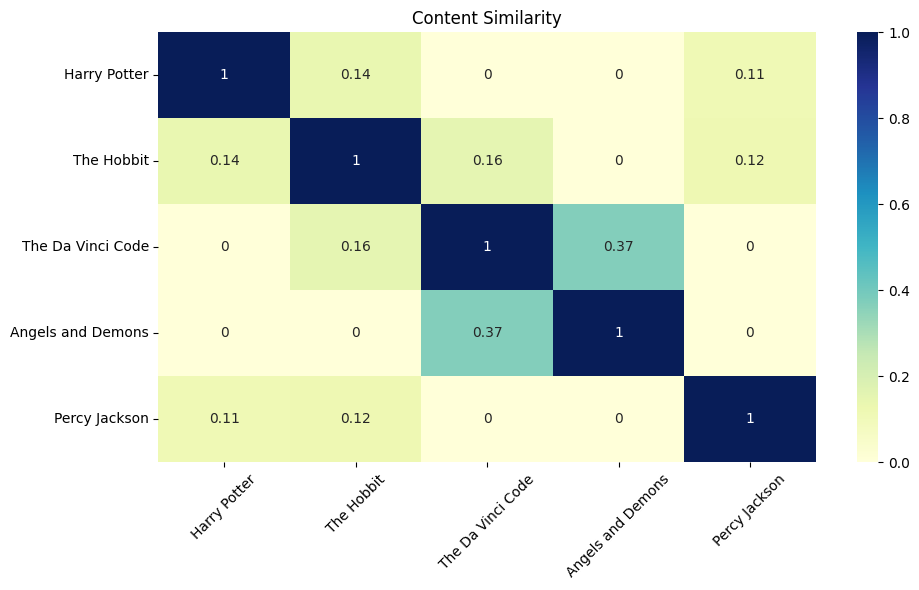

In [65]:
plt.figure(figsize=(10, 6))
sns.heatmap(content_similarity, xticklabels=books["Title"], yticklabels=books["Title"], annot=True, cmap="YlGnBu")
plt.title("Content Similarity")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [66]:
user_item_matrix = reatings.pivot_table(index='User_ID',columns='Book_ID', values='Rating').fillna(0)
user_similarity = cosine_similarity(user_item_matrix)

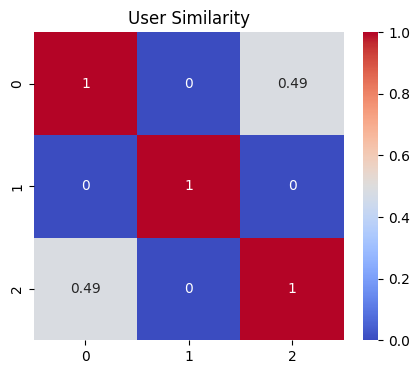

In [67]:
plt.figure(figsize=(5, 4))
sns.heatmap(user_similarity, annot=True, cmap='coolwarm')
plt.title("User Similarity")
plt.show()

In [68]:
import numpy as np
user_sim_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
similar_users = user_sim_df[1].sort_values(ascending=False)[1:]
print("Users most similar to User 1:")
print(similar_users)

Users most similar to User 1:
User_ID
3    0.487805
2    0.000000
Name: 1, dtype: float64


In [73]:
#Hybrid Recommendation
content_scores = content_similarity[book_index]
user_ratings = user_item_matrix.loc[1]
aligned_ratings = user_ratings.reindex(books['Book_ID']).fillna(0).values
hybrid_score = 0.6 * content_scores +0.4 * aligned_ratings

top_indices = np.argsort(hybrid_score)[::-1]
recommended_indices = [i for i in top_indices if i!=book_index][:3]

print("InHybrid Recommendations for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())

InHybrid Recommendations for User 1:
['The Hobbit', 'Percy Jackson', 'Angels and Demons']
